In [1]:
import os
import numpy as np
import pandas as pd
import time
import scanpy as sc
import torch

import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level=logging.INFO)

import sys
sys.path.append('../../')
import scDualGN
sys.path.append('../')
import expri_helper

/jdfssz1/ST_HEALTH/P18Z10200N0124/AI/user/baiyong/anaconda3/envs/mytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dat_path = expri_helper.get_path('Young', dat_ls_file='../expri_data.json')
adata = sc.read_h5ad(dat_path)

In [3]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [4]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2500)
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata, max_value=10)

In [5]:
adata

AnnData object with n_obs × n_vars = 5685 × 2500
    obs: 'celltype', 'celltype_str', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [6]:
#  def do_cluster(lr, alpha, gamma, nu):
    
#     print('=====================================')
#     print('lr:{}, alpha:{}, gamma:{}, nu:{}'.format(lr, alpha, gamma, nu))
#     start = time.time()
#     torch.cuda.empty_cache()
#     scdualgn_model = scDualGN.scDualGN(adata, n_z=20,device='cuda:1', batch_size=1024*2, verbosity=False, lr=lr).pretrain(alpha=alpha, beta=1, gamma=gamma)
#     scdualgn_model.cluster(n_cluster=11, eta=1, nu=nu, n_epochs=64)

#     end = time.time()
#     print('running time = {}'.format(end-start))

# for lr in [0.01, 0.001]:
#     for alpha in [0.5, 0.1, 0.05, 0.01]:
#         for gamma in [2,3,4,5,8,10]:
#             for nu in [0.1, 0.05, 0.01, 0.001, 1e-4]:
#                 do_cluster(lr, alpha, gamma, nu)

# lr, alpha, gamma, nu = 0.001, 0.5, 2, 0.01
# acc 0.8440, nmi 0.8130, ari 0.7555, hs 0.8421, cs 0.7858, purity: 0.9138

# lr, alpha, gamma, nu = 0.001, 0.5, 4, 0.01 *
# acc 0.8653, nmi 0.8180, ari 0.7563, hs 0.8281, cs 0.8081, purity: 0.8776

# lr, alpha, gamma, nu = 0.01, 0.5, 4, 0.01
lr, alpha, gamma, nu = 0.01, 0.01, 4, 0.01
# acc 0.8593, nmi 0.8263, ari 0.7804, hs 0.8543, cs 0.8001, purity: 0.9221
print('=====================================')
print('lr:{}, alpha:{}, gamma:{}, nu:{}'.format(lr, alpha, gamma, nu))
start = time.time()
torch.cuda.empty_cache()
scdualgn_model = scDualGN.scDualGN(adata, n_z=32,device='cuda:1', batch_size=1024*2, verbosity=True, lr=lr).pretrain(alpha=alpha, beta=1, gamma=gamma)
scdualgn_model.cluster(n_cluster=11, eta=1, nu=nu, n_epochs=64)

end = time.time()
print('running time = {}'.format(end-start))


INFO:scDualGN.run:dual-VAE pretrain start...


lr:0.01, alpha:0.01, gamma:4, nu:0.01


INFO:scDualGN.run:Epoch 1/100,Overall loss:3070.2722,MSE:2136.8824,MSE1:232.9859,KL: 144.6307
INFO:scDualGN.run:Epoch 2/100,Overall loss:1587.8739,MSE:1581.2984,MSE1:0.8377,KL: 322.4640
INFO:scDualGN.run:Epoch 3/100,Overall loss:1515.5106,MSE:1510.2632,MSE1:0.3366,KL: 390.1034
INFO:scDualGN.run:Epoch 4/100,Overall loss:1503.3334,MSE:1498.1550,MSE1:0.2886,KL: 402.3971
INFO:scDualGN.run:Epoch 5/100,Overall loss:1476.4461,MSE:1471.3281,MSE1:0.2730,KL: 402.6007
INFO:scDualGN.run:Epoch 6/100,Overall loss:1466.5844,MSE:1461.5973,MSE1:0.2652,KL: 392.6151
INFO:scDualGN.run:Epoch 7/100,Overall loss:1463.9319,MSE:1459.0294,MSE1:0.2657,KL: 383.9635
INFO:scDualGN.run:Epoch 8/100,Overall loss:1450.2559,MSE:1445.4209,MSE1:0.2529,KL: 382.3261
INFO:scDualGN.run:Epoch 9/100,Overall loss:1449.3704,MSE:1444.5348,MSE1:0.2583,KL: 380.2354
INFO:scDualGN.run:Epoch 10/100,Overall loss:1442.1259,MSE:1437.3077,MSE1:0.2552,KL: 379.7302
INFO:scDualGN.run:Epoch 11/100,Overall loss:1454.5973,MSE:1449.8614,MSE1:0.26

acc 0.8593, nmi 0.8263, ari 0.7804, hs 0.8543, cs 0.8001, purity: 0.9221
running time = 64.86926746368408


In [7]:
adata.obs['celltype_scDualGN']=scdualgn_model.y_pred_label
adata.obs['celltype_scDualGN'] = adata.obs['celltype_scDualGN'].astype('category')
adata.obsm['X_z']=scdualgn_model.z

sc.pp.neighbors(adata,n_neighbors=20,use_rep="X_z") 
sc.tl.umap(adata)

In [8]:
sc.settings.set_figure_params(dpi=300, figsize=(2, 2))

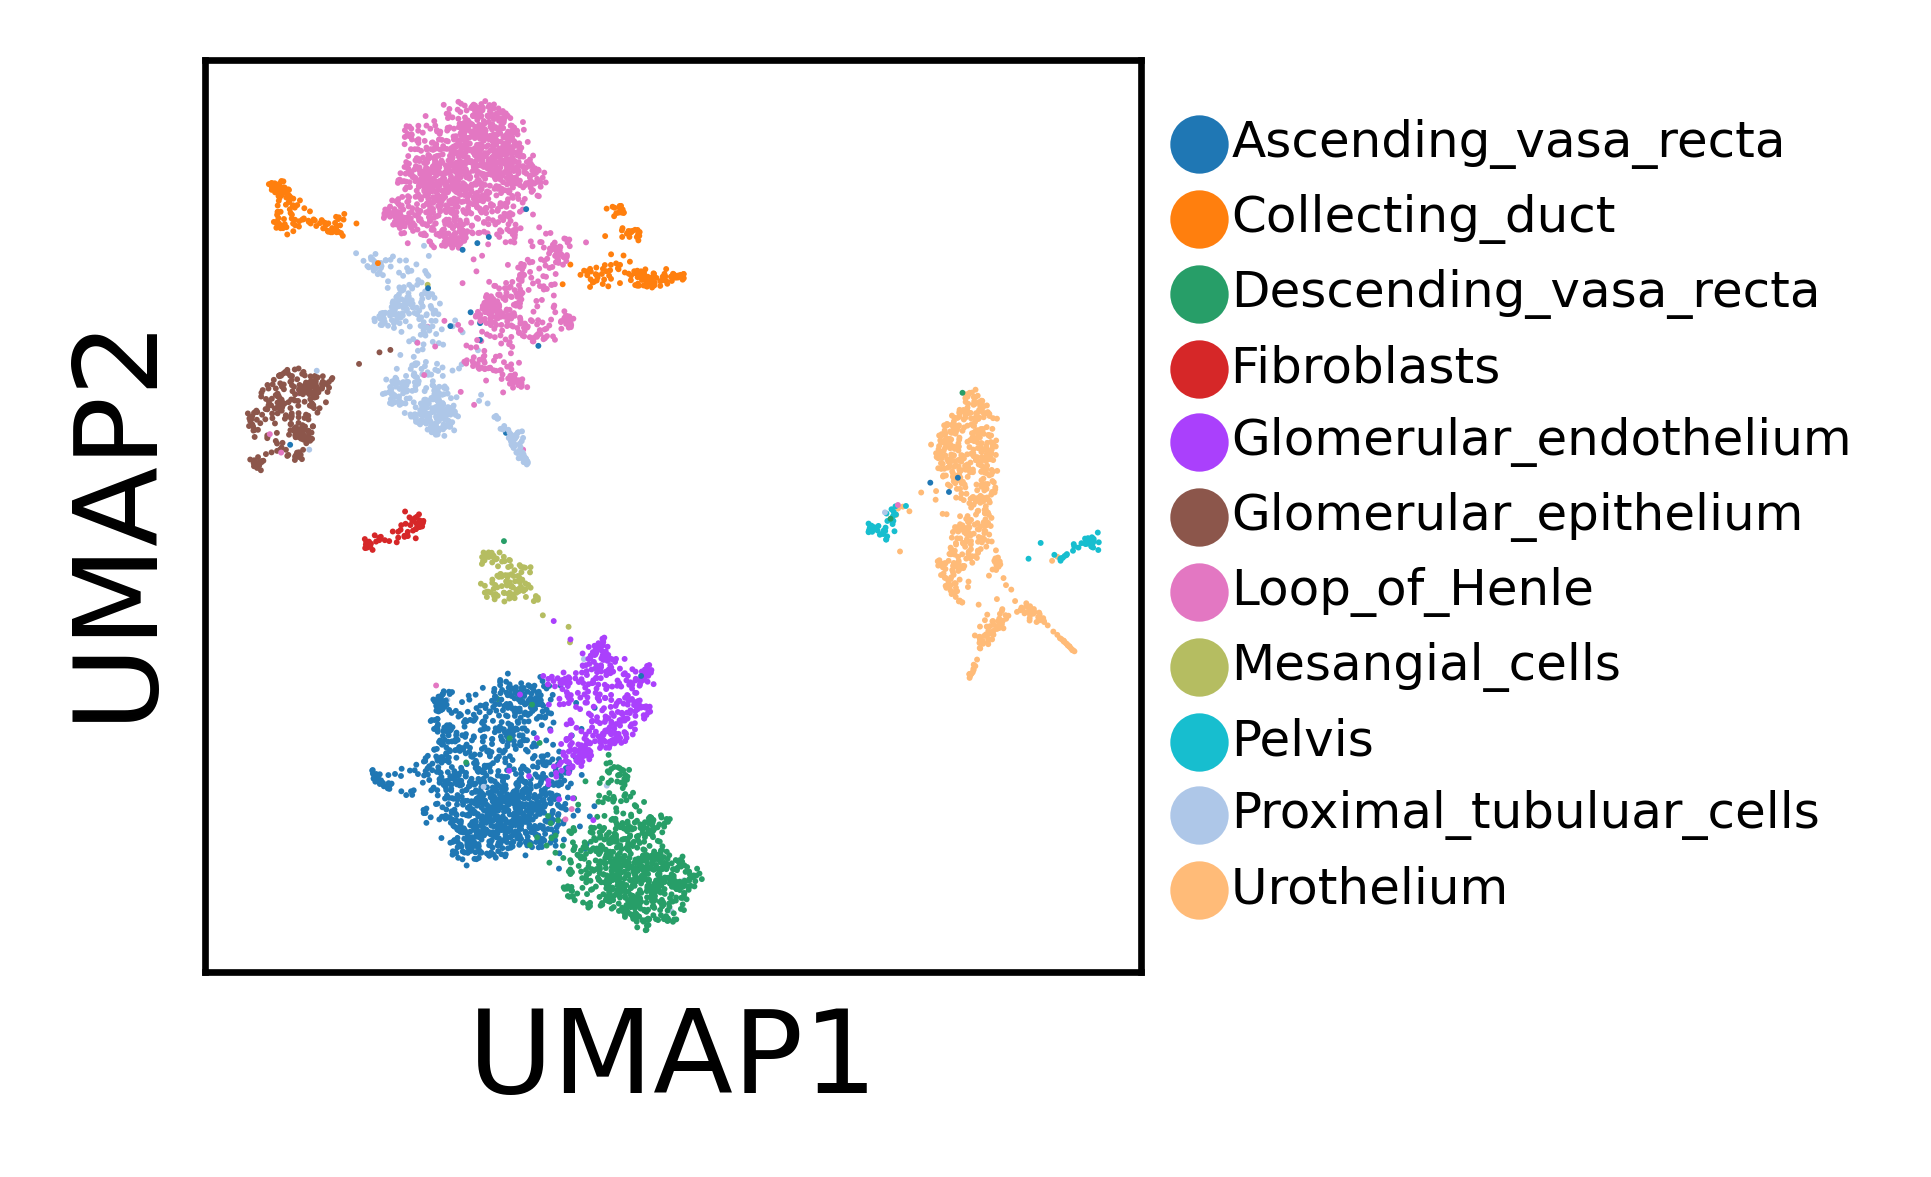

In [9]:
sc.pl.umap(adata, color=['celltype_str'],title='', size=2, legend_fontsize=6)

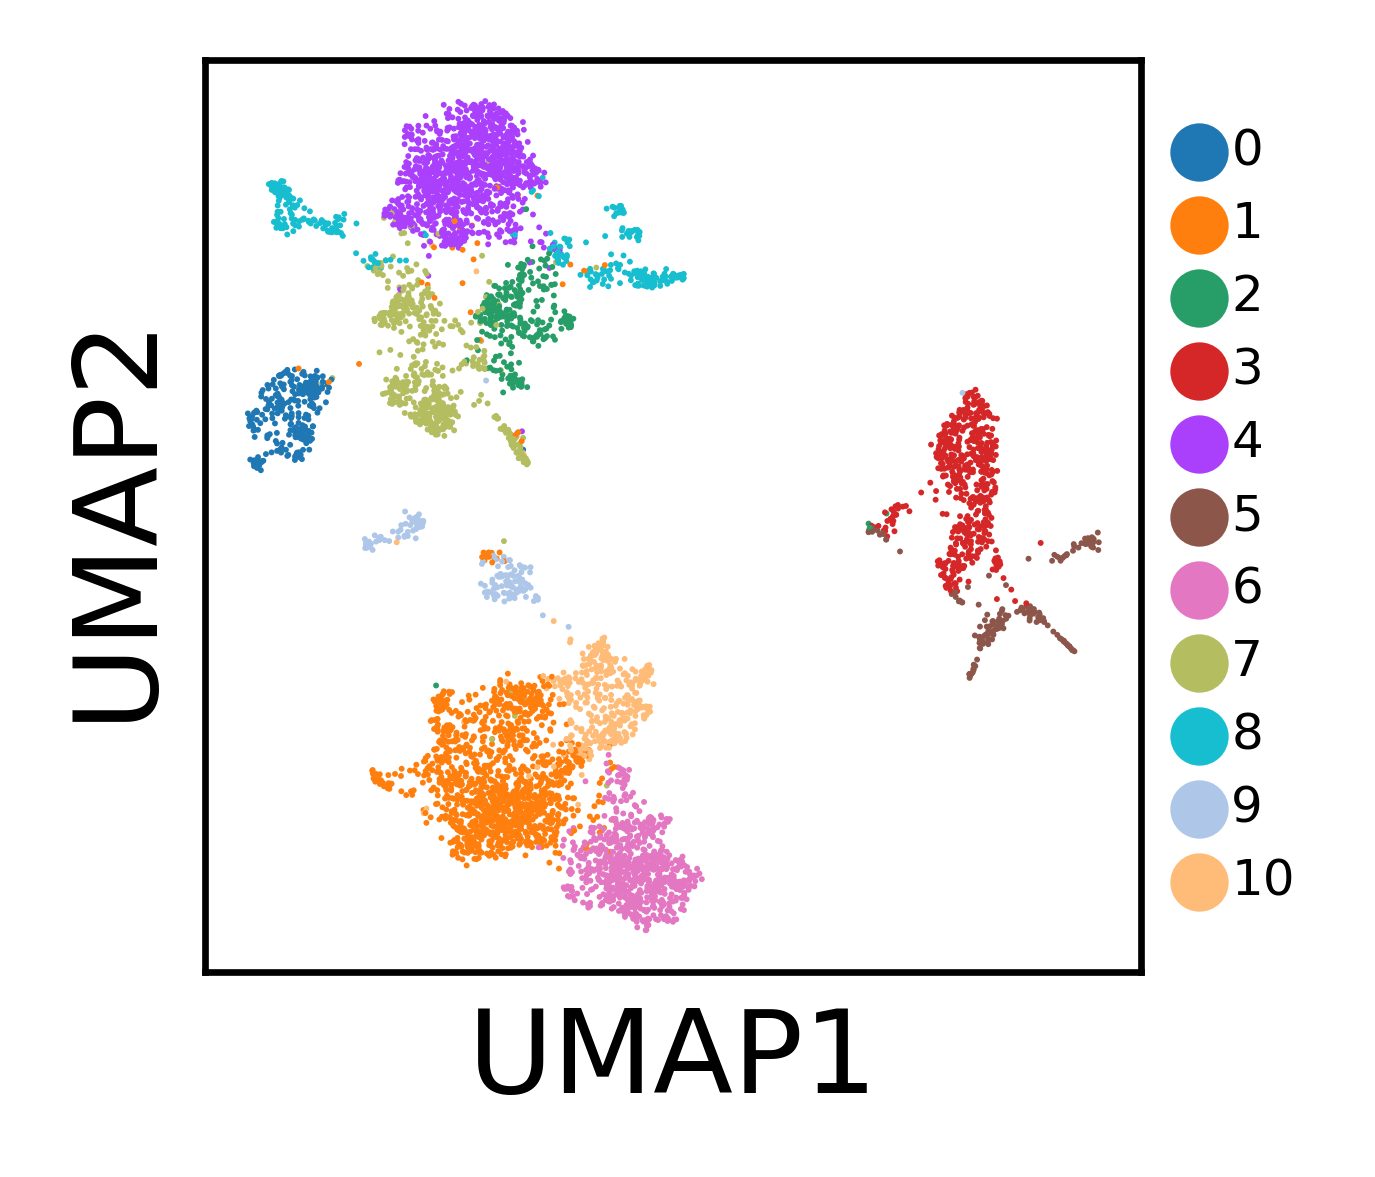

In [10]:
sc.pl.umap(adata, color=['celltype_scDualGN'],title='',size=2, legend_fontsize=6)

# 